In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import time
import torch
import torch.nn as nn
import torch.optim
import torchvision.models as models
import torchvision.transforms as transforms
import warnings
from PIL import Image 
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

device = torch.device("cuda:0")
warnings.filterwarnings("ignore")

# Damage Severity

In [2]:
train_path = 'C:/crisis_vision_benchmarks/tasks/damage_severity/consolidated/consolidated_damage_train_final.tsv'
test_path = 'C:/crisis_vision_benchmarks/tasks/damage_severity/consolidated/consolidated_damage_test_final.tsv'
dev_path = 'C:/crisis_vision_benchmarks/tasks/damage_severity/consolidated/consolidated_damage_dev_final.tsv'

train_label = pd.read_table(train_path)
test_label = pd.read_table(test_path)
dev_label = pd.read_table(dev_path)

print(train_label.shape)
print(test_label.shape)
print(dev_label.shape)

(28319, 4)
(3865, 4)
(2712, 4)


Class: severe
Count: 12810
Percentage: 45.23%

Class: little_or_none
Count: 11437
Percentage: 40.39%

Class: mild
Count: 4072
Percentage: 14.38%



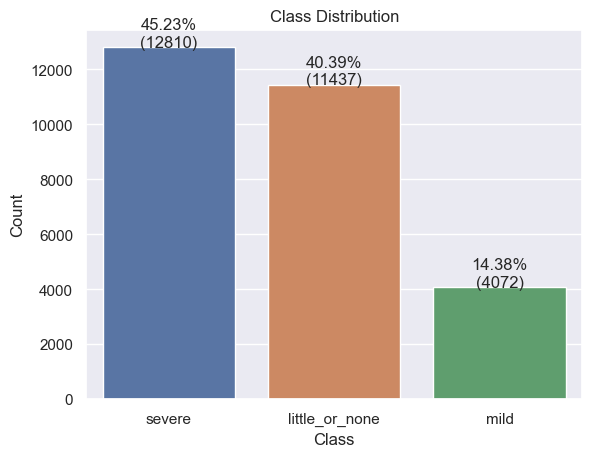

In [3]:
# severe 嚴重; little_or_none 輕微或無; mild 中等
class_count = train_label['class_label'].value_counts()

for class_name, count in class_count.items():
    print("Class:", class_name)
    print("Count:", count)
    print("Percentage: {:.2f}%".format(count / len(train_label) * 100))
    print()

# Visualization
sns.set(style="darkgrid")
ax = sns.barplot(x=class_count.index, y=class_count.values)
ax.set_title("Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(train_label))
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(f'{percentage}\n({count})', (x, y), ha='center')

plt.show()

Class: little_or_none
Count: 2135
Percentage: 55.24%

Class: severe
Count: 1101
Percentage: 28.49%

Class: mild
Count: 629
Percentage: 16.27%



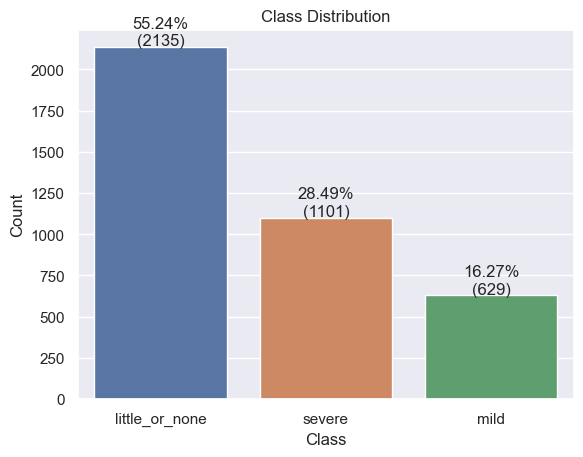

In [4]:
# severe 嚴重; little_or_none 輕微或無; mild 中等
class_count = test_label['class_label'].value_counts()

for class_name, count in class_count.items():
    print("Class:", class_name)
    print("Count:", count)
    print("Percentage: {:.2f}%".format(count / len(test_label) * 100))
    print()

# Visualization
sns.set(style="darkgrid")
ax = sns.barplot(x=class_count.index, y=class_count.values)
ax.set_title("Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(test_label))
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(f'{percentage}\n({count})', (x, y), ha='center')

plt.show()

Class: little_or_none
Count: 1378
Percentage: 50.81%

Class: severe
Count: 845
Percentage: 31.16%

Class: mild
Count: 489
Percentage: 18.03%



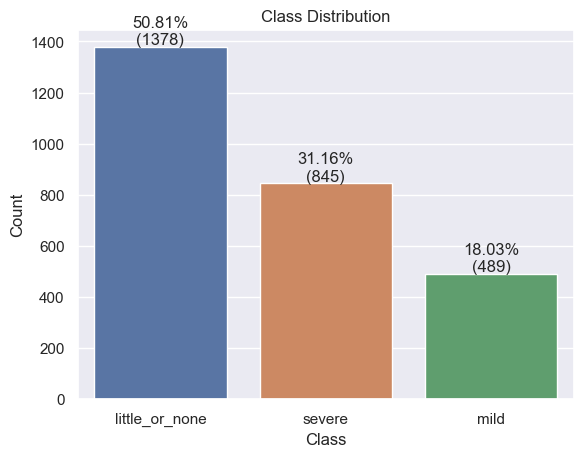

In [5]:
# severe 嚴重; little_or_none 輕微或無; mild 中等
class_count = dev_label['class_label'].value_counts()

for class_name, count in class_count.items():
    print("Class:", class_name)
    print("Count:", count)
    print("Percentage: {:.2f}%".format(count / len(dev_label) * 100))
    print()

# Visualization
sns.set(style="darkgrid")
ax = sns.barplot(x=class_count.index, y=class_count.values)
ax.set_title("Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(dev_label))
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(f'{percentage}\n({count})', (x, y), ha='center')

plt.show()

# Disaster Types

In [6]:
dt_train_path = 'C:/crisis_vision_benchmarks/tasks/disaster_types/consolidated/consolidated_disaster_types_train_final.tsv'
dt_test_path = 'C:/crisis_vision_benchmarks/tasks/disaster_types/consolidated/consolidated_disaster_types_test_final.tsv'
dt_dev_path = 'C:/crisis_vision_benchmarks/tasks/disaster_types/consolidated/consolidated_disaster_types_dev_final.tsv'

train_label = pd.read_table(dt_train_path)
test_label = pd.read_table(dt_test_path)
dev_label = pd.read_table(dt_dev_path)

print(train_label.shape)
print(test_label.shape)
print(dev_label.shape)

(12846, 4)
(3195, 4)
(1470, 4)


Class: not_disaster
Count: 3666
Percentage: 28.54%

Class: flood
Count: 2336
Percentage: 18.18%

Class: earthquake
Count: 2058
Percentage: 16.02%

Class: hurricane
Count: 1444
Percentage: 11.24%

Class: fire
Count: 1270
Percentage: 9.89%

Class: other_disaster
Count: 1132
Percentage: 8.81%

Class: landslide
Count: 940
Percentage: 7.32%



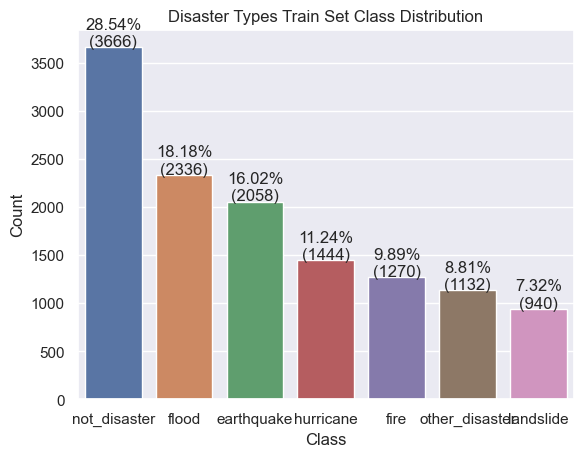

In [7]:
# not_disaster; flood; earthquake; hurricane; fire; other_disaster; landslide
class_count = train_label['class_label'].value_counts()

for class_name, count in class_count.items():
    print("Class:", class_name)
    print("Count:", count)
    print("Percentage: {:.2f}%".format(count / len(train_label) * 100))
    print()

# Visualization
sns.set(style="darkgrid")
ax = sns.barplot(x=class_count.index, y=class_count.values)
ax.set_title("Disaster Types Train Set Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(train_label))
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(f'{percentage}\n({count})', (x, y), ha='center')

plt.show()

Class: not_disaster
Count: 990
Percentage: 30.99%

Class: flood
Count: 599
Percentage: 18.75%

Class: earthquake
Count: 404
Percentage: 12.64%

Class: hurricane
Count: 352
Percentage: 11.02%

Class: other_disaster
Count: 302
Percentage: 9.45%

Class: fire
Count: 280
Percentage: 8.76%

Class: landslide
Count: 268
Percentage: 8.39%



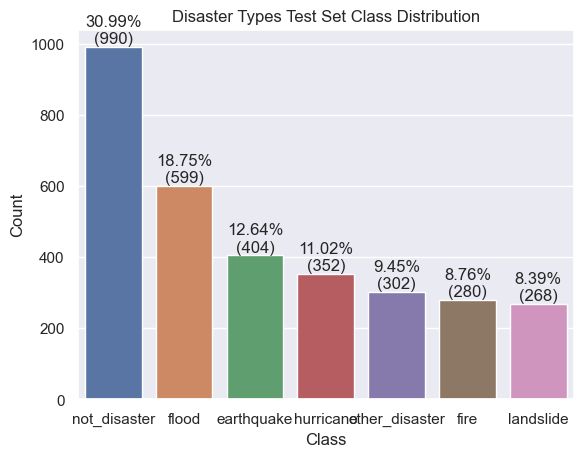

In [8]:
# not_disaster; flood; earthquake; hurricane; fire; other_disaster; landslide
class_count = test_label['class_label'].value_counts()

for class_name, count in class_count.items():
    print("Class:", class_name)
    print("Count:", count)
    print("Percentage: {:.2f}%".format(count / len(test_label) * 100))
    print()

# Visualization
sns.set(style="darkgrid")
ax = sns.barplot(x=class_count.index, y=class_count.values)
ax.set_title("Disaster Types Test Set Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(test_label))
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(f'{percentage}\n({count})', (x, y), ha='center')

plt.show()

Class: not_disaster
Count: 435
Percentage: 29.59%

Class: flood
Count: 266
Percentage: 18.10%

Class: earthquake
Count: 207
Percentage: 14.08%

Class: hurricane
Count: 175
Percentage: 11.90%

Class: other_disaster
Count: 143
Percentage: 9.73%

Class: landslide
Count: 123
Percentage: 8.37%

Class: fire
Count: 121
Percentage: 8.23%



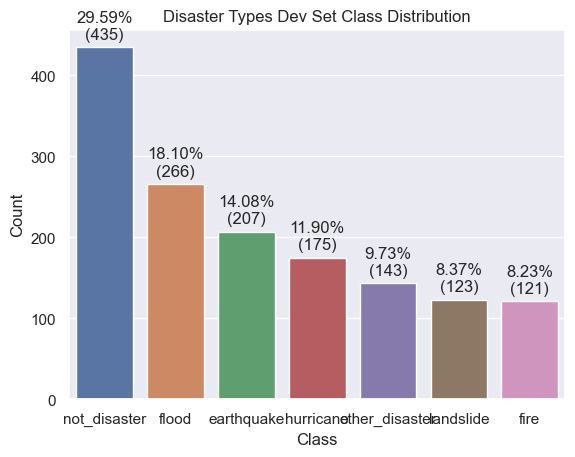

In [9]:
# not_disaster; flood; earthquake; hurricane; fire; other_disaster; landslide
class_count = dev_label['class_label'].value_counts()

for class_name, count in class_count.items():
    print("Class:", class_name)
    print("Count:", count)
    print("Percentage: {:.2f}%".format(count / len(dev_label) * 100))
    print()

# Visualization
sns.set(style="darkgrid")
ax = sns.barplot(x=class_count.index, y=class_count.values)
ax.set_title("Disaster Types Dev Set Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(dev_label))
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(f'{percentage}\n({count})', (x, y), ha='center')

plt.show()

# Humanitarian

In [10]:
hm_train_path = 'C:/crisis_vision_benchmarks/tasks/humanitarian/consolidated/consolidated_hum_train_final.tsv'
hm_test_path = 'C:/crisis_vision_benchmarks/tasks/humanitarian/consolidated/consolidated_hum_test_final.tsv'
hm_dev_path = 'C:/crisis_vision_benchmarks/tasks/humanitarian/consolidated/consolidated_hum_dev_final.tsv'

train_label = pd.read_table(hm_train_path)
test_label = pd.read_table(hm_test_path)
dev_label = pd.read_table(hm_dev_path)

print(train_label.shape)
print(test_label.shape)
print(dev_label.shape)

(12618, 4)
(2922, 4)
(1229, 4)


Class: not_humanitarian
Count: 6076
Percentage: 48.15%

Class: infrastructure_and_utility_damage
Count: 4001
Percentage: 31.71%

Class: rescue_volunteering_or_donation_effort
Count: 1769
Percentage: 14.02%

Class: affected_injured_or_dead_people
Count: 772
Percentage: 6.12%



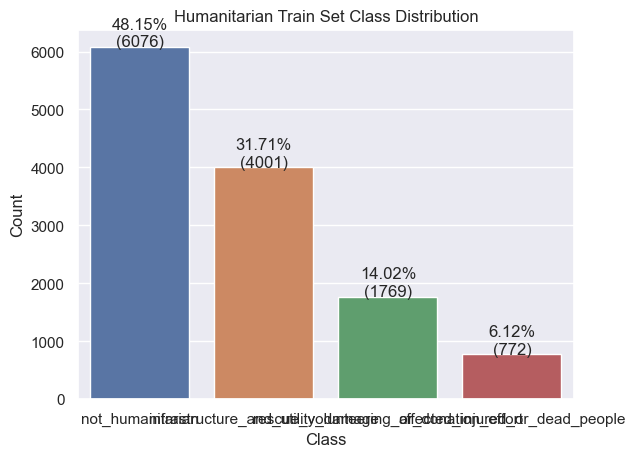

In [11]:
# not_humanitarian; infrastructure_and_utility_damage; rescue_volunteering_or_donation_effort; affected_injured_or_dead_people
class_count = train_label['class_label'].value_counts()

for class_name, count in class_count.items():
    print("Class:", class_name)
    print("Count:", count)
    print("Percentage: {:.2f}%".format(count / len(train_label) * 100))
    print()

# Visualization
sns.set(style="darkgrid")
ax = sns.barplot(x=class_count.index, y=class_count.values)
ax.set_title("Humanitarian Train Set Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(train_label))
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(f'{percentage}\n({count})', (x, y), ha='center')

plt.show()

Class: not_humanitarian
Count: 1550
Percentage: 53.05%

Class: infrastructure_and_utility_damage
Count: 821
Percentage: 28.10%

Class: rescue_volunteering_or_donation_effort
Count: 391
Percentage: 13.38%

Class: affected_injured_or_dead_people
Count: 160
Percentage: 5.48%



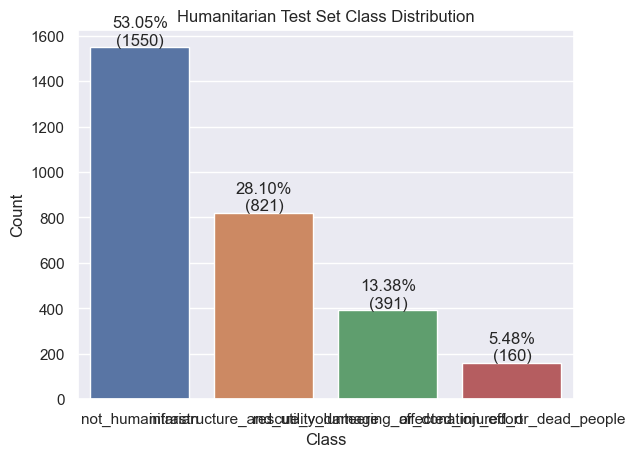

In [12]:
# not_humanitarian; infrastructure_and_utility_damage; rescue_volunteering_or_donation_effort; affected_injured_or_dead_people
class_count = test_label['class_label'].value_counts()

for class_name, count in class_count.items():
    print("Class:", class_name)
    print("Count:", count)
    print("Percentage: {:.2f}%".format(count / len(test_label) * 100))
    print()

# Visualization
sns.set(style="darkgrid")
ax = sns.barplot(x=class_count.index, y=class_count.values)
ax.set_title("Humanitarian Test Set Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(test_label))
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(f'{percentage}\n({count})', (x, y), ha='center')

plt.show()

Class: not_humanitarian
Count: 578
Percentage: 47.03%

Class: infrastructure_and_utility_damage
Count: 406
Percentage: 33.03%

Class: rescue_volunteering_or_donation_effort
Count: 172
Percentage: 14.00%

Class: affected_injured_or_dead_people
Count: 73
Percentage: 5.94%



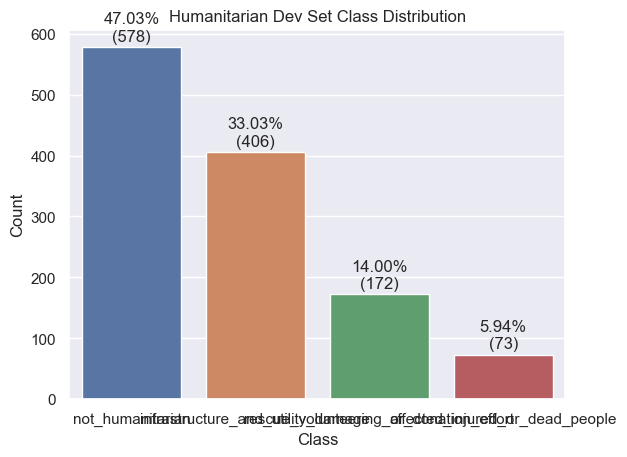

In [13]:
# not_humanitarian; infrastructure_and_utility_damage; rescue_volunteering_or_donation_effort; affected_injured_or_dead_people
class_count = dev_label['class_label'].value_counts()

for class_name, count in class_count.items():
    print("Class:", class_name)
    print("Count:", count)
    print("Percentage: {:.2f}%".format(count / len(dev_label) * 100))
    print()

# Visualization
sns.set(style="darkgrid")
ax = sns.barplot(x=class_count.index, y=class_count.values)
ax.set_title("Humanitarian Dev Set Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(dev_label))
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(f'{percentage}\n({count})', (x, y), ha='center')

plt.show()

# Informativeness

In [14]:
if_train_path = 'C:/crisis_vision_benchmarks/tasks/informative/consolidated/consolidated_info_train_final.tsv'
if_test_path = 'C:/crisis_vision_benchmarks/tasks/informative/consolidated/consolidated_info_test_final.tsv'
if_dev_path = 'C:/crisis_vision_benchmarks/tasks/informative/consolidated/consolidated_info_dev_final.tsv'

train_label = pd.read_table(if_train_path)
test_label = pd.read_table(if_test_path)
dev_label = pd.read_table(if_dev_path)

print(train_label.shape)
print(test_label.shape)
print(dev_label.shape)

(48186, 4)
(8477, 4)
(3054, 4)


Class: informative
Count: 26486
Percentage: 54.97%

Class: not_informative
Count: 21700
Percentage: 45.03%



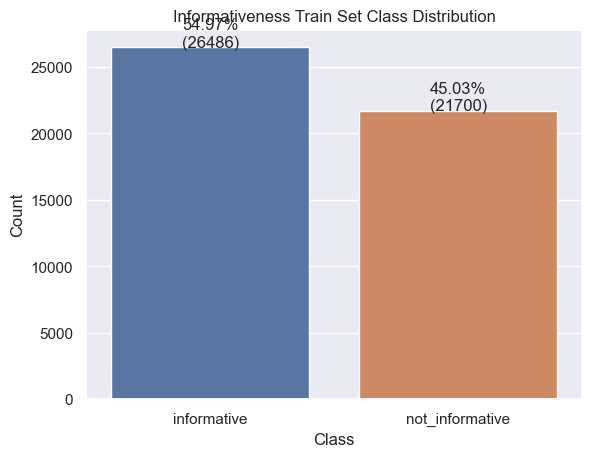

In [15]:
# informative; not informative
class_count = train_label['class_label'].value_counts()

for class_name, count in class_count.items():
    print("Class:", class_name)
    print("Count:", count)
    print("Percentage: {:.2f}%".format(count / len(train_label) * 100))
    print()

# Visualization
sns.set(style="darkgrid")
ax = sns.barplot(x=class_count.index, y=class_count.values)
ax.set_title("Informativeness Train Set Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(train_label))
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(f'{percentage}\n({count})', (x, y), ha='center')

plt.show()

Class: not_informative
Count: 5063
Percentage: 59.73%

Class: informative
Count: 3414
Percentage: 40.27%



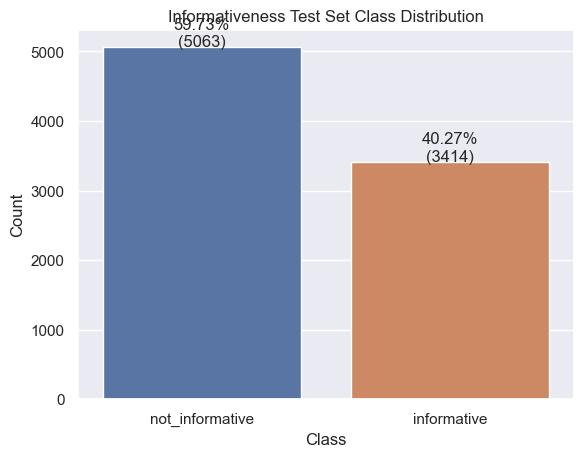

In [16]:
# informative; not informative
class_count = test_label['class_label'].value_counts()

for class_name, count in class_count.items():
    print("Class:", class_name)
    print("Count:", count)
    print("Percentage: {:.2f}%".format(count / len(test_label) * 100))
    print()

# Visualization
sns.set(style="darkgrid")
ax = sns.barplot(x=class_count.index, y=class_count.values)
ax.set_title("Informativeness Test Set Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(test_label))
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(f'{percentage}\n({count})', (x, y), ha='center')

plt.show()

Class: not_informative
Count: 1622
Percentage: 53.11%

Class: informative
Count: 1432
Percentage: 46.89%



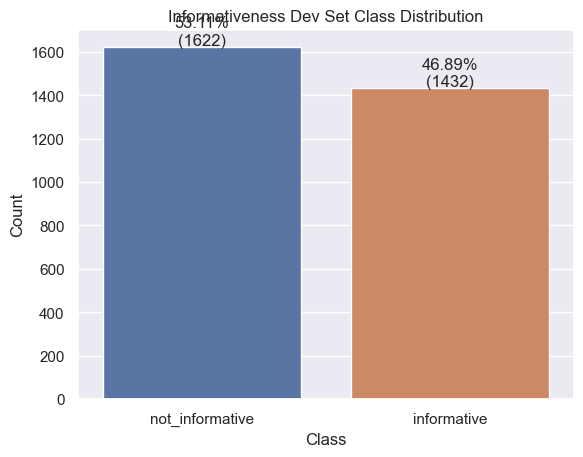

In [17]:
# informative; not informative
class_count = dev_label['class_label'].value_counts()

for class_name, count in class_count.items():
    print("Class:", class_name)
    print("Count:", count)
    print("Percentage: {:.2f}%".format(count / len(dev_label) * 100))
    print()

# Visualization
sns.set(style="darkgrid")
ax = sns.barplot(x=class_count.index, y=class_count.values)
ax.set_title("Informativeness Dev Set Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / len(dev_label))
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(f'{percentage}\n({count})', (x, y), ha='center')

plt.show()